# Import

In [376]:
import requests
import json
from tqdm import tqdm
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Data

## ZHVI ZIP Code

In [377]:
zhvi = pd.read_csv("../data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")

In [378]:
zhvi.head(1)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,243122.00,241608.00,241689.00,241663.00,242216.00,242889.00,242769.00,243621.00,243991.00,245685.00,246986.00,248619.00,250144.00,253160.00,254869.00,255836.00,256706.00,257621.00,260367.00,260931.00,262647.00,262288.00,264374.00,267103.00,270700.00,274140.00,278514.00,283575.00,287582.00,291805.00,294497.00,299708.00,304718.00,311547.00,315497.00,318318.00,321238.00,324233.00,327404.00,329679.00,334146.00,339526.00,348050.00,356222.00,365404.00,373372.00,382177.00,390898.00,397721.00,405449.00,413202.00,423743.00,433270.00,442186.00,45

In [379]:
#zhvi["address"] = zhvi.RegionType+" "+zhvi.RegionName.astype(str)+", "+zhvi.City+", "+zhvi.StateName+", US"
zhvi["address"] = zhvi.RegionName.astype(str)+", "+zhvi.City+", "+zhvi.StateName+", US"

In [380]:
data = zhvi[["2020-12-31", "address","RegionName"]].copy()

In [381]:
data.rename({"2020-12-31":"price",
            "RegionName": "zip"}, axis='columns',inplace=True)

## Pull data from API (get venues for each zip)

In [382]:
sub_dist = pd.read_csv("../data/datapull_0-2555_dist.csv")

In [383]:
sub_dist2 = pd.read_csv("../data/datapull_2nd_dist.csv")

In [384]:
sub_dist=pd.concat([sub_dist,sub_dist2],axis=0).copy()

In [385]:
del sub_dist["Unnamed: 0"]

In [386]:
sub_dist.head(5)

,Rental Car Location,Bar,Pharmacy,Sandwich Place,Mediterranean Restaurant,Coffee Shop,Event Space,Hotel,Jewelry Store,Grocery Store,Women's Store,Restaurant,Chiropractor,Pizza Place,Mexican Restaurant,Fried Chicken Joint,Salon / Barbershop,Donut Shop,Office,Other Great Outdoors,Hot Dog Joint,Indie Movie Theater,Diner,Dentist's Office,Clothing Store,Gym / Fitness Center,Metro Station,Scenic Lookout,Medical Center,Ramen Restaurant,Electronics Store,Bus Station,Playground,Athletics & Sports,Korean Restaurant,Bookstore,Tech Startup,Bike Rental / Bike Share,Wine Bar,Miscellaneous Shop,Thrift / Vintage Store,Music Venue,Historic Site,Martial Arts School,Comedy Club,Scandinavian Restaurant,Costume Shop,Bank,Other Nightlife,Record Shop,Taco Place,Bagel Shop,Nightclub,Real Estate Office,Ice Cream Shop,Boutique,Adult Boutique,Parking,Music Store,Video Game Store,Bakery,Residential Building (Apartment / Condo),Arts & Crafts Store,Spiritual Center,Cosmetics Shop,Dry Cleaner,Synagogue,Food Truck,Optical Shop,Building,Spa,Gift Shop,Plaza,Café,Hardware Store,Indian Restaurant,Newsstand,Lawyer,Kitchen Supply Store,Spanish Restaurant,Movie Theater,Private School,Massage Studio,Italian Restaurant,Fast Food Restaurant,Yoga Studio,Non-Profit,Salad Place,General College & University,Gym,Kids Store,Food,Pet Service,Urgent Care Center,Cafeteria,Hospital,Furniture / Home Store,Design Studio,Housing Development,Automotive Shop,Gas Station,Daycare,Juice Bar,American Restaurant,Recreation Center,Church,Convenience Store,High School,Storage Facility,Middle School,BBQ Joint,Baseball Field,Hobby Shop,Home Service,Elementary School,Nail Salon,Dumpling Restaurant,Trail,Moving Target,Vietnamese Restaurant,Doctor's Office,Pool,Sushi Restaurant,Laundry Service,Bed & Breakfast,College Academic Building,Sporting Goods Shop,Performing Arts Venue,Bus Line,Shoe Store,Eye Doctor,Cocktail Bar,Greek Restaurant,Veterinarian,Lingerie Store,Bus Stop,Monument / Landmark,Nightlife Spot,College Cafeteria,Seafood Restaurant,French Restaurant,Food Service,Planetarium,Japanese Restaurant,Burger Joint,Basketball Court,Frame Store,School,Rest Area,Liquor Store,Mobile Phone Shop,Video Store,Bike Shop,Pawn Shop,Chinese Restaurant,Discount Store,Boat or Ferry,Financial or Legal Service,Harbor / Marina,Lake,Venezuelan Restaurant,Outdoors & Recreation,Construction & Landscaping,Lounge,Latin American Restaurant,Student Center,Park,Coworking Space,Thai Restaurant,Wine Shop,Library,Deli / Bodega,Sports Bar,Flea Market,Shop & Service,Photography Studio,Snack Place,Business Service,Middle Eastern Restaurant,Art Gallery,Post Office,Big Box Store,Locksmith,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,General Entertainment,Courthouse,Recycling Facility,Fire Station,Print Shop,Assisted Living,Lighthouse,Brewery,Police Station,Hindu Temple,Tattoo Parlor,Wings Joint,College Bookstore,Pet Store,General Travel,Breakfast Spot,Beer Garden,College Administrative Building,Nursery School,College Library,College Auditorium,College Quad,Candy Store,College Lab,Volleyball Court,Caribbean Restaurant,Gay Bar,Speakeasy,Motel,Conference Room,Community College,Factory,Health & Beauty Service,Men's Store,Buffet,Theater,Convention Center,Check Cashing Service,Southern / Soul Food Restaurant,Accessories Store,Department Store,Dance Studio,Laundromat,Campaign Office,Dog Run,Dessert Shop,Professional & Other Places,Tennis Court,Insurance Office,Basketball Stadium,African Restaurant,Toy / Game Store,Driving School,Flower Shop,Cemetery,Football Stadium,Bridge,Smoke Shop,Garden,Tailor Shop,Tanning Salon,Beer Bar,Strip Club,Dive Bar,Comic Shop,Nutritionist,Food Court,Pool Hall,Mattress Store,Shopping Mall,Empanada Restaurant,Skating Rink,College Classroom,Comfort Food Restaurant,Arcade,Government Building,Golf Course,Physical Therapist,Resort,Field,Jazz Club,Cuban Restaurant,Casino,Tree,Farm,Track,College Basketball Court,Farmers Market,Language School,City Hall,Business Center,Photography Lab,Commun

In [387]:
sub_dist.shape[0]

6079

In [388]:
sub=data[0:sub_dist.shape[0]].copy()
sub.shape

(6079, 3)

In [389]:
sub.tail(1)

,price,address,zip
6078,192464.00,"82501, Riverton, WY, US",82501


In [390]:
assert all([a == b for a, b in zip(sub.zip, sub_dist.zip_code)])

In [391]:
sub_dist.shape

(6079, 731)

In [392]:
sub[["price","address"]].shape

(6079, 2)

In [18]:
sub_data=pd.merge(left=sub,right= sub_dist,  left_on="zip", right_on="zip_code").copy()

In [19]:
sub_data.reset_index(inplace=True,drop = True)

In [20]:
#sub_data = pd.concat([sub[["price","address"]], sub_dist], axis=1).copy()

In [21]:
sub_data.head(5)

,price,address,zip,Rental Car Location,Bar,Pharmacy,Sandwich Place,Mediterranean Restaurant,Coffee Shop,Event Space,Hotel,Jewelry Store,Grocery Store,Women's Store,Restaurant,Chiropractor,Pizza Place,Mexican Restaurant,Fried Chicken Joint,Salon / Barbershop,Donut Shop,Office,Other Great Outdoors,Hot Dog Joint,Indie Movie Theater,Diner,Dentist's Office,Clothing Store,Gym / Fitness Center,Metro Station,Scenic Lookout,Medical Center,Ramen Restaurant,Electronics Store,Bus Station,Playground,Athletics & Sports,Korean Restaurant,Bookstore,Tech Startup,Bike Rental / Bike Share,Wine Bar,Miscellaneous Shop,Thrift / Vintage Store,Music Venue,Historic Site,Martial Arts School,Comedy Club,Scandinavian Restaurant,Costume Shop,Bank,Other Nightlife,Record Shop,Taco Place,Bagel Shop,Nightclub,Real Estate Office,Ice Cream Shop,Boutique,Adult Boutique,Parking,Music Store,Video Game Store,Bakery,Residential Building (Apartment / Condo),Arts & Crafts Store,Spiritual Center,Cosmetics Shop,Dry Cleaner,Synagogue,Food Truck,Optical Shop,Building,Spa,Gift Shop,Plaza,Café,Hardware Store,Indian Restaurant,Newsstand,Lawyer,Kitchen Supply Store,Spanish Restaurant,Movie Theater,Private School,Massage Studio,Italian Restaurant,Fast Food Restaurant,Yoga Studio,Non-Profit,Salad Place,General College & University,Gym,Kids Store,Food,Pet Service,Urgent Care Center,Cafeteria,Hospital,Furniture / Home Store,Design Studio,Housing Development,Automotive Shop,Gas Station,Daycare,Juice Bar,American Restaurant,Recreation Center,Church,Convenience Store,High School,Storage Facility,Middle School,BBQ Joint,Baseball Field,Hobby Shop,Home Service,Elementary School,Nail Salon,Dumpling Restaurant,Trail,Moving Target,Vietnamese Restaurant,Doctor's Office,Pool,Sushi Restaurant,Laundry Service,Bed & Breakfast,College Academic Building,Sporting Goods Shop,Performing Arts Venue,Bus Line,Shoe Store,Eye Doctor,Cocktail Bar,Greek Restaurant,Veterinarian,Lingerie Store,Bus Stop,Monument / Landmark,Nightlife Spot,College Cafeteria,Seafood Restaurant,French Restaurant,Food Service,Planetarium,Japanese Restaurant,Burger Joint,Basketball Court,Frame Store,School,Rest Area,Liquor Store,Mobile Phone Shop,Video Store,Bike Shop,Pawn Shop,Chinese Restaurant,Discount Store,Boat or Ferry,Financial or Legal Service,Harbor / Marina,Lake,Venezuelan Restaurant,Outdoors & Recreation,Construction & Landscaping,Lounge,Latin American Restaurant,Student Center,Park,Coworking Space,Thai Restaurant,Wine Shop,Library,Deli / Bodega,Sports Bar,Flea Market,Shop & Service,Photography Studio,Snack Place,Business Service,Middle Eastern Restaurant,Art Gallery,Post Office,Big Box Store,Locksmith,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,General Entertainment,Courthouse,Recycling Facility,Fire Station,Print Shop,Assisted Living,Lighthouse,Brewery,Police Station,Hindu Temple,Tattoo Parlor,Wings Joint,College Bookstore,Pet Store,General Travel,Breakfast Spot,Beer Garden,College Administrative Building,Nursery School,College Library,College Auditorium,College Quad,Candy Store,College Lab,Volleyball Court,Caribbean Restaurant,Gay Bar,Speakeasy,Motel,Conference Room,Community College,Factory,Health & Beauty Service,Men's Store,Buffet,Theater,Convention Center,Check Cashing Service,Southern / Soul Food Restaurant,Accessories Store,Department Store,Dance Studio,Laundromat,Campaign Office,Dog Run,Dessert Shop,Professional & Other Places,Tennis Court,Insurance Office,Basketball Stadium,African Restaurant,Toy / Game Store,Driving School,Flower Shop,Cemetery,Football Stadium,Bridge,Smoke Shop,Garden,Tailor Shop,Tanning Salon,Beer Bar,Strip Club,Dive Bar,Comic Shop,Nutritionist,Food Court,Pool Hall,Mattress Store,Shopping Mall,Empanada Restaurant,Skating Rink,College Classroom,Comfort Food Restaurant,Arcade,Government Building,Golf Course,Physical Therapist,Resort,Field,Jazz Club,Cuban Restaurant,Casino,Tree,Farm,Track,College Basketball Court,Farmers Market,Language School,City Hall,Business Center,Phot

## Sample data - for test feature engineering 

### Get rare_venues

In [22]:
sub_dist.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
Rental Car Location,674.0,1.321958,0.815102,1.0,1.0,1.0,1.0,9.0
Bar,2272.0,1.699384,1.166402,1.0,1.0,1.0,2.0,13.0
Pharmacy,2411.0,1.417669,0.693900,1.0,1.0,1.0,2.0,5.0
Sandwich Place,2221.0,1.282305,0.567115,1.0,1.0,1.0,1.0,5.0
Mediterranean Restaurant,249.0,1.132530,0.384301,1.0,1.0,1.0,1.0,3.0
Coffee Shop,2101.0,1.414089,0.756478,1.0,1.0,1.0,2.0,7.0
Event Space,1691.0,1.301005,0.653524,1.0,1.0,1.0,1.0,9.0
Hotel,1002.0,1.792415,1.398880,1.0,1.0,1.0,2.0,12.0
Jewelry Store,823.0,1.250304,0.592366,1.0,1.0,1.0,1.0,6.0
Grocery Store,2251.0,1.371390,0.665839,1.0,1.0,1.0,2.0,5.0


In [23]:
rare_venues = sub_dist.columns[sub_dist.describe().transpose()["count"]==1]

### Missing value imputation: replace NaN with 0

In [24]:
sub_data.fillna(0, inplace=True)

In [25]:
sub_data.head()

,price,address,zip,Rental Car Location,Bar,Pharmacy,Sandwich Place,Mediterranean Restaurant,Coffee Shop,Event Space,Hotel,Jewelry Store,Grocery Store,Women's Store,Restaurant,Chiropractor,Pizza Place,Mexican Restaurant,Fried Chicken Joint,Salon / Barbershop,Donut Shop,Office,Other Great Outdoors,Hot Dog Joint,Indie Movie Theater,Diner,Dentist's Office,Clothing Store,Gym / Fitness Center,Metro Station,Scenic Lookout,Medical Center,Ramen Restaurant,Electronics Store,Bus Station,Playground,Athletics & Sports,Korean Restaurant,Bookstore,Tech Startup,Bike Rental / Bike Share,Wine Bar,Miscellaneous Shop,Thrift / Vintage Store,Music Venue,Historic Site,Martial Arts School,Comedy Club,Scandinavian Restaurant,Costume Shop,Bank,Other Nightlife,Record Shop,Taco Place,Bagel Shop,Nightclub,Real Estate Office,Ice Cream Shop,Boutique,Adult Boutique,Parking,Music Store,Video Game Store,Bakery,Residential Building (Apartment / Condo),Arts & Crafts Store,Spiritual Center,Cosmetics Shop,Dry Cleaner,Synagogue,Food Truck,Optical Shop,Building,Spa,Gift Shop,Plaza,Café,Hardware Store,Indian Restaurant,Newsstand,Lawyer,Kitchen Supply Store,Spanish Restaurant,Movie Theater,Private School,Massage Studio,Italian Restaurant,Fast Food Restaurant,Yoga Studio,Non-Profit,Salad Place,General College & University,Gym,Kids Store,Food,Pet Service,Urgent Care Center,Cafeteria,Hospital,Furniture / Home Store,Design Studio,Housing Development,Automotive Shop,Gas Station,Daycare,Juice Bar,American Restaurant,Recreation Center,Church,Convenience Store,High School,Storage Facility,Middle School,BBQ Joint,Baseball Field,Hobby Shop,Home Service,Elementary School,Nail Salon,Dumpling Restaurant,Trail,Moving Target,Vietnamese Restaurant,Doctor's Office,Pool,Sushi Restaurant,Laundry Service,Bed & Breakfast,College Academic Building,Sporting Goods Shop,Performing Arts Venue,Bus Line,Shoe Store,Eye Doctor,Cocktail Bar,Greek Restaurant,Veterinarian,Lingerie Store,Bus Stop,Monument / Landmark,Nightlife Spot,College Cafeteria,Seafood Restaurant,French Restaurant,Food Service,Planetarium,Japanese Restaurant,Burger Joint,Basketball Court,Frame Store,School,Rest Area,Liquor Store,Mobile Phone Shop,Video Store,Bike Shop,Pawn Shop,Chinese Restaurant,Discount Store,Boat or Ferry,Financial or Legal Service,Harbor / Marina,Lake,Venezuelan Restaurant,Outdoors & Recreation,Construction & Landscaping,Lounge,Latin American Restaurant,Student Center,Park,Coworking Space,Thai Restaurant,Wine Shop,Library,Deli / Bodega,Sports Bar,Flea Market,Shop & Service,Photography Studio,Snack Place,Business Service,Middle Eastern Restaurant,Art Gallery,Post Office,Big Box Store,Locksmith,Indonesian Restaurant,Vegetarian / Vegan Restaurant,Supermarket,General Entertainment,Courthouse,Recycling Facility,Fire Station,Print Shop,Assisted Living,Lighthouse,Brewery,Police Station,Hindu Temple,Tattoo Parlor,Wings Joint,College Bookstore,Pet Store,General Travel,Breakfast Spot,Beer Garden,College Administrative Building,Nursery School,College Library,College Auditorium,College Quad,Candy Store,College Lab,Volleyball Court,Caribbean Restaurant,Gay Bar,Speakeasy,Motel,Conference Room,Community College,Factory,Health & Beauty Service,Men's Store,Buffet,Theater,Convention Center,Check Cashing Service,Southern / Soul Food Restaurant,Accessories Store,Department Store,Dance Studio,Laundromat,Campaign Office,Dog Run,Dessert Shop,Professional & Other Places,Tennis Court,Insurance Office,Basketball Stadium,African Restaurant,Toy / Game Store,Driving School,Flower Shop,Cemetery,Football Stadium,Bridge,Smoke Shop,Garden,Tailor Shop,Tanning Salon,Beer Bar,Strip Club,Dive Bar,Comic Shop,Nutritionist,Food Court,Pool Hall,Mattress Store,Shopping Mall,Empanada Restaurant,Skating Rink,College Classroom,Comfort Food Restaurant,Arcade,Government Building,Golf Course,Physical Therapist,Resort,Field,Jazz Club,Cuban Restaurant,Casino,Tree,Farm,Track,College Basketball Court,Farmers Market,Language School,City Hall,Business Center,Phot

### Combine very sparse locations

In [26]:
sub_data.shape

(6079, 734)

In [27]:
not_rare_venues = set(sub_dist.columns).difference(rare_venues)

In [28]:
not_rare_sum = sub_dist[not_rare_venues].sum(axis=1)

In [29]:
rare_sum = sub_dist[rare_venues].sum(axis=1)

In [30]:
len(rare_sum)

6079

In [31]:
sub_dist[rare_venues].shape

(6079, 31)

In [32]:
assert all([a == b for a, b in zip(sub_dist.zip_code, sub_data.zip_code)])

In [33]:
rare_sum

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      0.0
62      1.0
63      0.0
64      0.0
65      0.0
66      0.0
67      0.0
68      0.0
69      0.0
70      0.0
71      0.0
72      0.0
73      0.0
74      0.0
75      0.0
76      0.0
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [34]:
sub_data["rare"] = list(rare_sum)

In [35]:
sub_data["not_rare"] = list(not_rare_sum)

In [36]:
len(not_rare_venues)

700

In [37]:
sub_dist_final = sub_data[list(not_rare_venues) + ["price","address","zip_code", "rare"]].copy()

In [38]:
sub_dist_final.shape

(6079, 704)

In [39]:
import sklearn

In [40]:
#!pip install pandas_profiling

In [41]:
from pandas_profiling import ProfileReport

In [42]:
profile = ProfileReport(sub_dist_final, title='Pandas Profiling Report', explorative=True)

In [70]:
#profile.to_html()

In [71]:
#profile.to_widgets()

## Get rid of non-venue data

In [72]:
data_final = sub_dist_final[sub_dist_final.venue_count!=0].copy()

In [130]:
import numpy as np

# Modeling

In [168]:
from sklearn.model_selection import train_test_split

In [210]:
venue_ge_20 = sub_dist.columns[sub_dist.sum(axis=0)>=20]

In [211]:
len(venue_ge_20)

528

### Training/Testing Prep

In [329]:
predictors = [i for i in not_rare_venues if i !="zip_code"]

In [330]:
predictors.append("rare")

In [331]:
#X = data_final[predictors].copy()
X = data_final[venue_ge_20].copy()

In [332]:
X.head(5)

,Rental Car Location,Bar,Pharmacy,Sandwich Place,Mediterranean Restaurant,Coffee Shop,Event Space,Hotel,Jewelry Store,Grocery Store,Women's Store,Restaurant,Chiropractor,Pizza Place,Mexican Restaurant,Fried Chicken Joint,Salon / Barbershop,Donut Shop,Office,Other Great Outdoors,Hot Dog Joint,Indie Movie Theater,Diner,Dentist's Office,Clothing Store,Gym / Fitness Center,Metro Station,Scenic Lookout,Medical Center,Ramen Restaurant,Electronics Store,Bus Station,Playground,Athletics & Sports,Korean Restaurant,Bookstore,Tech Startup,Bike Rental / Bike Share,Wine Bar,Miscellaneous Shop,Thrift / Vintage Store,Music Venue,Historic Site,Martial Arts School,Comedy Club,Costume Shop,Bank,Other Nightlife,Record Shop,Taco Place,Bagel Shop,Nightclub,Real Estate Office,Ice Cream Shop,Boutique,Adult Boutique,Parking,Music Store,Video Game Store,Bakery,Residential Building (Apartment / Condo),Arts & Crafts Store,Spiritual Center,Cosmetics Shop,Dry Cleaner,Synagogue,Food Truck,Optical Shop,Building,Spa,Gift Shop,Plaza,Café,Hardware Store,Indian Restaurant,Newsstand,Lawyer,Kitchen Supply Store,Spanish Restaurant,Movie Theater,Private School,Massage Studio,Italian Restaurant,Fast Food Restaurant,Yoga Studio,Non-Profit,Salad Place,General College & University,Gym,Kids Store,Food,Pet Service,Urgent Care Center,Cafeteria,Hospital,Furniture / Home Store,Design Studio,Housing Development,Automotive Shop,Gas Station,Daycare,Juice Bar,American Restaurant,Recreation Center,Church,Convenience Store,High School,Storage Facility,Middle School,BBQ Joint,Baseball Field,Hobby Shop,Home Service,Elementary School,Nail Salon,Dumpling Restaurant,Trail,Moving Target,Vietnamese Restaurant,Doctor's Office,Pool,Sushi Restaurant,Laundry Service,Bed & Breakfast,College Academic Building,Sporting Goods Shop,Performing Arts Venue,Bus Line,Shoe Store,Eye Doctor,Cocktail Bar,Greek Restaurant,Veterinarian,Lingerie Store,Bus Stop,Monument / Landmark,Nightlife Spot,College Cafeteria,Seafood Restaurant,French Restaurant,Food Service,Planetarium,Japanese Restaurant,Burger Joint,Basketball Court,Frame Store,School,Rest Area,Liquor Store,Mobile Phone Shop,Video Store,Bike Shop,Pawn Shop,Chinese Restaurant,Discount Store,Boat or Ferry,Financial or Legal Service,Harbor / Marina,Lake,Outdoors & Recreation,Construction & Landscaping,Lounge,Latin American Restaurant,Student Center,Park,Coworking Space,Thai Restaurant,Wine Shop,Library,Deli / Bodega,Sports Bar,Flea Market,Shop & Service,Photography Studio,Snack Place,Business Service,Middle Eastern Restaurant,Art Gallery,Post Office,Big Box Store,Locksmith,Vegetarian / Vegan Restaurant,Supermarket,General Entertainment,Courthouse,Recycling Facility,Fire Station,Print Shop,Assisted Living,Lighthouse,Brewery,Police Station,Tattoo Parlor,Wings Joint,College Bookstore,Pet Store,General Travel,Breakfast Spot,Beer Garden,College Administrative Building,Nursery School,College Library,College Auditorium,College Quad,Candy Store,College Lab,Volleyball Court,Caribbean Restaurant,Gay Bar,Speakeasy,Motel,Conference Room,Community College,Factory,Health & Beauty Service,Men's Store,Buffet,Theater,Convention Center,Check Cashing Service,Southern / Soul Food Restaurant,Accessories Store,Department Store,Dance Studio,Laundromat,Campaign Office,Dog Run,Dessert Shop,Professional & Other Places,Tennis Court,Insurance Office,Basketball Stadium,African Restaurant,Toy / Game Store,Driving School,Flower Shop,Cemetery,Football Stadium,Bridge,Smoke Shop,Garden,Tailor Shop,Tanning Salon,Beer Bar,Strip Club,Dive Bar,Comic Shop,Food Court,Pool Hall,Mattress Store,Shopping Mall,Skating Rink,College Classroom,Comfort Food Restaurant,Arcade,Government Building,Golf Course,Physical Therapist,Resort,Field,Jazz Club,Cuban Restaurant,Casino,Tree,Farm,Track,College Basketball Court,Farmers Market,City Hall,Business Center,Photography Lab,Community Center,College Stadium,Acupuncturist,Car Wash,Adult Education Center,Fruit & Vegetable Store,Asian Restaurant,Boxing Gym,Suppl

In [333]:
y = np.log(data_final.price)
# y=data_final.price

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 1. Linear Regressions

#### Modeling

In [335]:
from sklearn.linear_model import LinearRegression

In [336]:
lin_reg = LinearRegression()

In [337]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [338]:
#lin_reg.intercept_, lin_reg.coef_

#### Training test results

In [339]:
from sklearn.metrics import r2_score

In [340]:
y_train_pred = lin_reg.predict(X_train)  

if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,

In [248]:
lin_reg.score(X_train,y_train)

0.6092074905689221

In [249]:
r2_score(y_train, y_train_pred)

0.6092074905689221

In [278]:
import math

In [279]:
sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)

0.492024342927325

In [308]:
sklearn.metrics.mean_squared_error(y_train.apply(math.exp),[math.exp(i) for i in y_train_pred], squared = False)

242089.62942706322

#### Testing test results

In [251]:
y_test_pred = lin_reg.predict(X_test)  

In [252]:
r2_score(y_test, y_test_pred)

0.4843733000269813

In [253]:
sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)

0.49830713751128847

In [309]:
sklearn.metrics.mean_squared_error(y_test.apply(math.exp),[math.exp(i) for i in y_test_pred], squared = False)

312630.51270913286

Residual

In [323]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [324]:
res_log = y_test- y_test_pred

In [328]:
res_log.describe()

count   1411.00
mean       0.03
std        0.55
min       -2.05
25%       -0.30
50%        0.01
75%        0.34
max        2.48
Name: price, dtype: float64

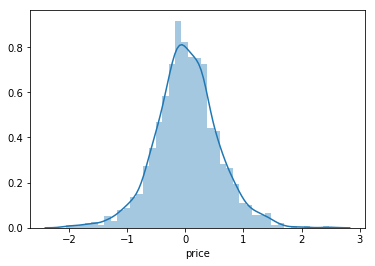

In [325]:
seaborn.distplot(res_log)

In [326]:
res_abs = y_test.apply(math.exp) - [math.exp(i) for i in y_test_pred]

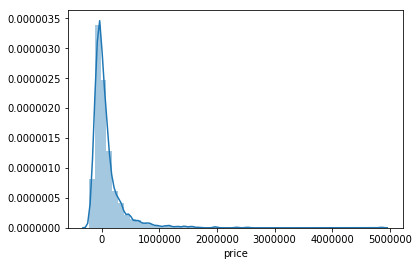

In [327]:
seaborn.distplot(res_abs)

In [317]:
res_abs.describe()

count      1411.00
mean      85895.53
std      300705.64
min     -223788.19
25%      -64733.54
50%        3748.62
75%      120380.89
max     4853193.37
Name: price, dtype: float64

#### Under-valued

In [343]:
y_pred = lin_reg.predict(X)  

In [360]:
res_abs = [math.exp(i) for i in y_pred] - y.apply(math.exp)

In [400]:
valued_data = pd.DataFrame()

In [410]:
valued_data["pred"]=list([math.exp(i) for i in y_pred])
valued_data["pred_over_price"]=list(res_abs)
valued_data["zip_code"]=data_final.T.drop_duplicates().T["zip_code"]
valued_data["price"]=data_final["price"]
valued_data["address"]=data_final["address"]

In [412]:
sorted_valued_data = valued_data.sort_values(by='pred_over_price', ascending=False, na_position='last').copy()

In [420]:
zhvi[zhvi.RegionName==37209]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,address
1057,74240,1068,37209,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,108734.00,108999.00,109283.00,109896.00,110493.00,111177.00,111639.00,112234.00,112787.00,113438.00,114063.00,114677.00,115411.00,116117.00,116736.00,117284.00,117920.00,118600.00,119173.00,119805.00,120392.00,121121.00,121645.00,122152.00,122790.00,123478.00,124440.00,125270.00,125998.00,126422.00,127676.00,128340.00,129175.00,129712.00,130666.00,131812.00,132074.00,132598.00,132765.00,133310.00,133875.00,134551.00,135009.00,135866.00,136764.00,137178.00,137681.00,137839.00,138949.00,139363.00,140128.00,14

In [414]:
sorted_valued_data[sorted_valued_data.pred_over_price>400000].dropna(how="any")

,pred_over_price,zip_code,price,pred,address
1057,835561.57,37209,377999.00,1198061.57,"37209, Nashville, TN, US"
2589,795045.48,98203,471781.00,2348407.48,"98203, Everett, WA, US"
96,766683.92,75067,277452.00,1227462.92,"75067, Lewisville, TX, US"
4989,765019.47,72104,88157.00,1369656.47,"72104, Malvern, AR, US"
3079,723226.41,80239,373781.00,1171203.41,"80239, Denver, CO, US"
2710,647004.99,35209,405554.00,1366726.99,"35209, Homewood, AL, US"
683,638685.92,77386,261762.00,1491004.92,"77386, Spring, TX, US"
19,607283.12,11235,364460.00,1053121.12,"11235, New York, NY, US"
1971,588781.20,77338,181417.00,845349.20,"77338, Humble, TX, US"
2494,567194.07,94954,718530.00,1195581.07,"94954, Petaluma, CA, US"


### 2. Random Forest

In [259]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


In [260]:
rnd_clf = RandomForestRegressor(n_estimators=500, n_jobs=-1, max_leaf_nodes=16, max_features=25, random_state=42)

In [261]:
rnd_clf.fit(X_train, y_train)

RandomForestRegressor(max_features=25, max_leaf_nodes=16, n_estimators=500,
                      n_jobs=-1, random_state=42)

#### train testing

In [265]:
y_train_pred = rnd_clf.predict(X_train)

In [266]:
r2_score(y, y_pred_rf)

-506453324358.88806

In [268]:
sklearn.metrics.mean_squared_error(y_train, y_train_pred, squared=False)

0.492024342927325

#### test testing

In [269]:
y_test_pred = rnd_clf.predict(X_test)

In [270]:
sklearn.metrics.mean_squared_error(y_test, y_test_pred, squared=False)

0.546160390426963

In [271]:
y.median()

12.504434980390057

In [272]:
import seaborn 

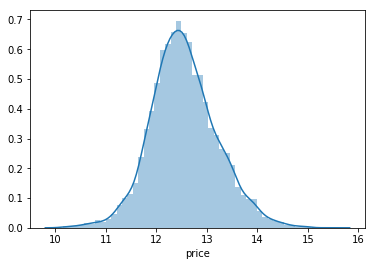

In [293]:
seaborn.distplot(y)

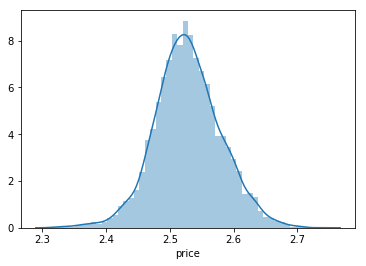

In [274]:
seaborn.distplot(np.log(y))

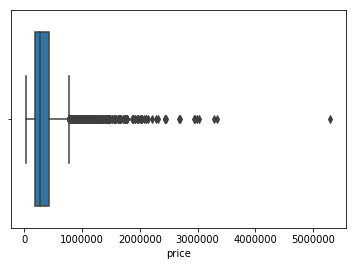

In [239]:
seaborn.boxplot(y)

### 3. Boost